In [1]:
!pip install geopandas
!pip install geodatasets

In [4]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from geodatasets import get_path

In [6]:
df_geo = pd.read_csv('pratica_olist/data/pratica_olist_table_olist_geolocation_dataset.csv')
df_geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [9]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [10]:

gdf = geopandas.GeoDataFrame(
    df_geo, geometry=geopandas.points_from_xy(df_geo.geolocation_lng, df_geo.geolocation_lat), crs="EPSG:4326"
)



In [11]:

sequential = pd.Series(df_geo['geolocation_state'].unique()).reset_index().rename(columns={0: "geolocation_state"})
sequential['index'] = sequential['index'].apply(lambda x: "C"+str(x))
df_geo = df_geo.merge(sequential, on="geolocation_state")

In [12]:
df_geo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,index
0,1037,-23.545621,-46.639292,sao paulo,SP,C0
1,1046,-23.546081,-46.644820,sao paulo,SP,C0
2,1046,-23.546129,-46.642951,sao paulo,SP,C0
3,1041,-23.544392,-46.639499,sao paulo,SP,C0
4,1035,-23.541578,-46.641607,sao paulo,SP,C0
...,...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS,C24
1000159,99900,-27.877125,-52.224882,getulio vargas,RS,C24
1000160,99950,-28.071855,-52.014716,tapejara,RS,C24
1000161,99980,-28.388932,-51.846871,david canabarro,RS,C24


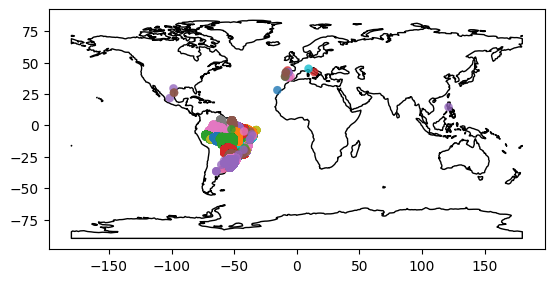

In [13]:
world = geopandas.read_file(get_path("naturalearth.land"))

ax = world.plot(color="white", edgecolor="black")

gdf.plot(ax=ax, color=df_geo['index'], alpha=0.8, linewidth=0.1)

plt.show()